In [3]:
library(ggplot2)
set.seed(737)
df1 <- data.frame(value = c(), mean = c())
confidence_interval <- function(vector, confidence_level) {
  a <- qnorm(1 - ((1 - confidence_level) / 2))
  erro <- a / sqrt(length(vector))
  result <- c((1 - erro) / mean(vector), (1 + erro) / mean(vector))
  return(result)
}
for (num in seq(100, 5000, 100)) {
    all_values <- c()
    for (i in 1:1050) {
        interval <- confidence_interval(rexp(num, 1.63), 0.99)
        all_values <- c(all_values, abs(interval[1] - interval[2]))
    }
    mean <- mean(all_values)
    df1 <- rbind(df1, data.frame(value = num, mean = mean))
}

Saving 6.67 x 6.67 in image



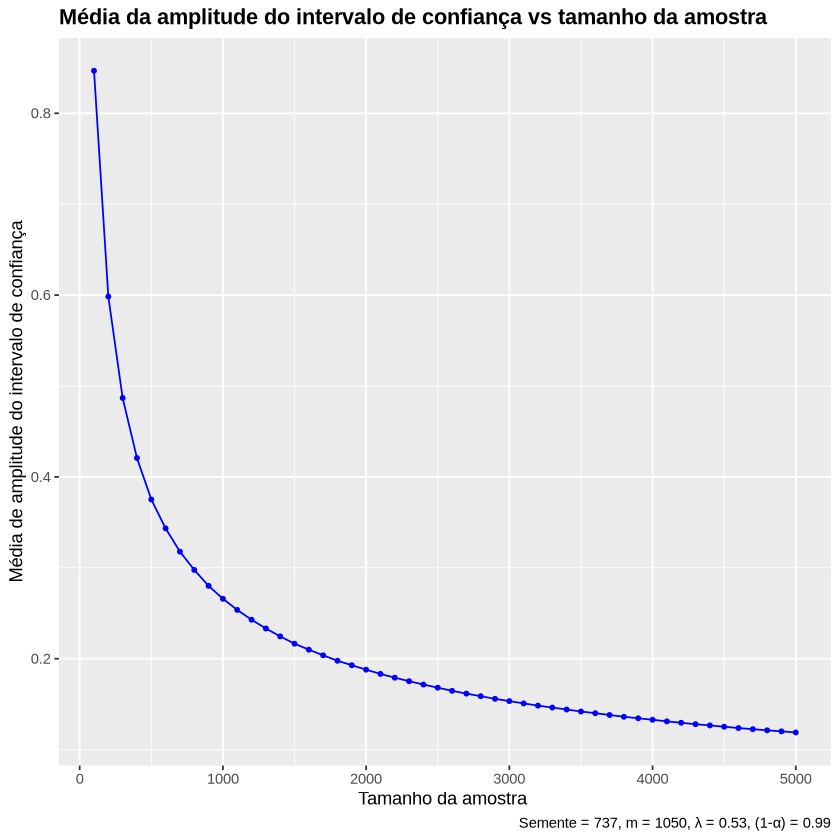

In [4]:
df1_plot <- ggplot(df1, aes(x = value, y = mean)) +
    labs(x = "Tamanho da amostra ", y = "Média de amplitude do intervalo de confiança", title = "Média da amplitude do intervalo de confiança vs tamanho da amostra",
    caption = "Semente = 737, m = 1050, λ = 0.53, (1-α) = 0.99") +
    theme(plot.title = element_text(size = 13, face = "bold")) +
    geom_line(color = "blue") +
    geom_point(size = 1, color = "blue")
ggsave("amplitudevssample.png", df1_plot)
df1_plot